In [21]:
#import necessary modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import necessary modules that are included into the function
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut,ShuffleSplit
import itertools 
import matplotlib.pyplot as plt
from math import log
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re


# files
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [22]:
dataset = pd.read_csv(r"C:/Users/foeke/OneDrive/Documenten/submitting paper/All scripts - paper/data/LocalModelData/ModellingDataset-Local.csv", sep=';')
pd.set_option('display.max_columns', None)
dataset.describe()

,Lopend_gemiddelde,Latitude,Longitude,elevation,industry_100,industry_1000,industry_25,industry_300,industry_3000,industry_50,industry_500,industry_5000,nightlight_3150,nightlight_450,nightlight_4950,nightlight_900,OMI_mean_filt,population_1000,population_3000,population_5000,radiation,road_class_1_100,road_class_1_1000,road_class_1_25,road_class_1_300,road_class_1_3000,road_class_1_50,road_class_1_500,road_class_1_5000,road_class_2_100,road_class_2_1000,road_class_2_25,road_class_2_300,road_class_2_3000,road_class_2_50,road_class_2_500,road_class_2_5000,road_class_3_100,road_class_3_1000,road_class_3_25,road_class_3_300,road_class_3_3000,road_class_3_50,road_class_3_500,road_class_3_5000,Rsp,temperature_2m_1,temperature_2m_10,temperature_2m_11,temperature_2m_12,temperature_2m_2,temperature_2m_3,temperature_2m_4,temperature_2m_5,temperature_2m_6,temperature_2m_7,temperature_2m_8,temperature_2m_9,trop_mean_filt,wind_speed_10m_1,wind_speed_10m_10,wind_speed_10m_11,wind_speed_10m_12,wind_speed_10m_2,wind_speed_10m_3,wind_speed_10m_4,wind_speed_10m_5,wind_speed_10m_6,wind_speed_10m_7,wind_speed_10m_8,wind_speed_10m_9,jan,feb,mar,apr,may,jun,jul,aug,oct,sep,nov,dec,BldDen100,BldDen500,BldDen1000,NDVI,trafBuf25,trafBuf50,trafBuf100,trafBuf400,trafBuf800
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,1.320000e+02,132.000000,132.000000,1.320000e+02,132.000000,132.000000,132.000000,132.000000,1.320000e+02,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,128.000000,31.000000,36.000000,47.000000,91.000000,121.000000
mean,35.226515,52.372723,4.887527,4.998295,402.543769,127810.374222,40.857247,5500.518358,2.082524e+06,100.197360,22542.127182,7.370602e+06,35.905065,42.025057,30.147216,41.298078,6.650835e+15,13436.109004,111157.013204,275107.860752,2.856060,32.446984,2154.787414,2.545587,270.440902,24826.558957,7.410652,649.679403,88821.129723,82.151582,4018.625685,11.268752,421.383174,26465.915084,27.745197,1081.499602,58553.226771,374.288432,25838.098341,39.839338,2713.633709,215141.744244,103.100403,7127.293323,507543.054814,9.361693,1.975841,13.775503,8.027410,5.200049,4.873354,8.080632,8.573431,14.355789,17.701253,17.905929,17.618928,14.355763,0.000091,3.939325,5.674535,4.426238,5.157636,5.051674,4.443038,4.029110,3.708070,4.335704,3.728119,3.496959,3.879354,60.791389,80.768208,54.028410,30.037180,34.589959,70.454947,129.275163,89.237420,80.746612,175.237674,105.636421,135.165371,0.842823,0.764579,0.722572,1788.968750,1021.271898,1080.411724,1197.058292,1153.746274,1206.573949
std,8.899995,0.032779,0.037693,2.244744,2532.895424,189702.391359,329.793101,17570.964611,1.926233e+06,780.612149,49343.146134,4.493604e+06,9.347635,17.262283,6.854039,15.636107,1.640597e+14,3020.579532,26750.374127,64093.403062,0.015723,129.681015,3131.494715,13.890270,658.889360,12220.175508,36.552953,1273.681361,16801.112766,138.279523,2568.553719,23.780049,525.167796,6971.116805,52.754438,1110.967673,9542.071192,246.423919,9567.874432,38.155453,1325.048619,55253.597896,85.684133,3102.116499,109906.623391,0.564695,0.140377,0.051606,0.137695,0.116100,0.014854,0.021869,0.014262,0.088980,0.095052,0.032220,0.011000,0.068629,0.000003,0.199956,0.284431,0.261652,0.254648,0.220771,0.157918,0.172030,0.136298,0.161069,0.153534,

In [23]:
#replace NA with 0
dataset=dataset.fillna(0)

### store geodata

In [24]:
dataset_xy = dataset

## Data processing

In [25]:
#get rid off unnecessary variables

#unique identifier and geodata
dataset = dataset.drop(['Longitude', 'Latitude'], axis=1)

print(len(dataset.columns))

##CREATE DEPENDENT- AND INDEPENDENT VARIABLES
#store all column names
all_column_names = dataset.columns

#create dataset with only predictor variables
x = dataset.drop(["Lopend_gemiddelde"], axis=1)
#store column names of predictor variables
feature_names = x.columns
#dependent variable
y = dataset["Lopend_gemiddelde"]
#verify if dependent variable is out of dataset
print(len(feature_names))

#transform dependent- and independent variables to numpy arrays for calculations
x = np.array(x)
y = np.array(y)

90
89


In [26]:
median_ranking = pd.read_csv(r'C:/Users/foeke/OneDrive/Documenten/submitting paper/All scripts - paper/data/LocalModelData/df_cv median-Local.csv', sep = ',')

In [27]:
median_ranking.head(10)

,Unnamed: 0,name,rank,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10,median
0,1,trafBuf50,2,1,1,1,1,2,1,3,1,1,1.0
1,0,road_class_2_5000,1,2,3,2,2,4,5,2,4,5,2.5
2,2,nightlight_900,3,3,2,5,5,1,7,1,2,4,3.0
3,3,Rsp,4,8,5,3,3,5,8,5,5,3,5.0
4,6,nightlight_450,7,4,7,6,4,3,11,9,6,2,6.0
5,13,NDVI,14,10,11,13,6,8,6,4,16,6,9.0
6,4,BldDen100,5,5,15,8,19,6,12,7,27,24,10.0
7,9,trafBuf25,10,9,10,17,22,44,3,28,3,8,10.0
8,12,population_5000,13,7,13,9,7,7,44,25,10,30,11.5
9,8,road_class_3_100,9,22,4,40,9,13,27,24,14,7,13.5


In [28]:
#CONSTRUCT FUNCTION 2 - CV AIC-MSE-R2

from sklearn.metrics import r2_score


#set initial model
model = LinearRegression()

#generate function that creates K-fold CV, thereby creating shap summary plot for each loop/fold.

def cvaic(data_x, data_y, model, nofolds, names, novar):
    ss = ShuffleSplit(n_splits=nofolds, test_size=0.25, random_state=0)
    
    total_aic = [0]
    total_msetest = [0]
    total_r2 = [0]
    total_rmse = [0]
    
    aic_scores = [0]
    
    for train, test in ss.split(data_x, data_y):
        data_x_train = np.array(data_x[train])
        data_y_train = np.array(data_y[train])
        data_x_test = np.array(data_x[test])
        data_y_test = np.array(data_y[test])

        # number of parameters
        num_params = novar + 1 #+1 for intercept
    
        def calculate_aic(n, mse, num_params):
            aic = n * log(mse) + 2 * num_params
            return aic
        
        # Train the model on training data
        model.fit(data_x_train, data_y_train)

        y_predicted = model.predict(data_x_test) #predict dependent var based on x number of most important ind. var.
        
        mse_test = mean_squared_error(data_y_test, y_predicted)

        
        #source AIC: https://machinelearningmastery.com/probabilistic-model-selection-measures/
    
        aic = calculate_aic(len(data_y_test), mse_test, num_params)
        
        r2 = r2_score(data_y_test, y_predicted)
        
        def rmse(predictions, targets):
                return np.sqrt(((predictions - targets) ** 2).mean())
        rmse_val = rmse(y_predicted, data_y_test)
        
        
        aic_vals= np.abs(aic)

        mse_vals= np.abs(mse_test)

        r2_vals = np.abs(r2)

        rmse_vals = np.abs(rmse_val)

        total_aic += aic_vals
        total_msetest += mse_vals
        total_r2 += r2_vals
        total_rmse += rmse_vals
        
        aic_scores.append(aic_vals) 
        

    cvaic.meanaic = total_aic/nofolds #allows use of local variable outside function
    cvaic.meanmse = total_msetest/nofolds
    cvaic.meanr2 = total_r2/nofolds
    cvaic.meanrmse = total_rmse/nofolds
    cvaic.aic_scores = aic_scores

## Create list of No. most important predictors

In [29]:
locals()["Novar"] = []
i=1
novar = range(1,31,1) #30 best predictors are subject to predictor selection
while i < len(novar):
    print(i)
    sorted_vars_names = median_ranking['name'].head(novar[i])

    sorted_vars_names = sorted_vars_names.to_string(index=False)
    names = '|'.join(sorted_vars_names.split())

    print(names)
    locals()["Novar"].append(names)
    i+=1

1
trafBuf50|road_class_2_5000
2
trafBuf50|road_class_2_5000|nightlight_900
3
trafBuf50|road_class_2_5000|nightlight_900|Rsp
4
trafBuf50|road_class_2_5000|nightlight_900|Rsp|nightlight_450
5
trafBuf50|road_class_2_5000|nightlight_900|Rsp|nightlight_450|NDVI
6
trafBuf50|road_class_2_5000|nightlight_900|Rsp|nightlight_450|NDVI|BldDen100
7
trafBuf50|road_class_2_5000|nightlight_900|Rsp|nightlight_450|NDVI|BldDen100|trafBuf25
8
trafBuf50|road_class_2_5000|nightlight_900|Rsp|nightlight_450|NDVI|BldDen100|trafBuf25|population_5000
9
trafBuf50|road_class_2_5000|nightlight_900|Rsp|nightlight_450|NDVI|BldDen100|trafBuf25|population_5000|road_class_3_100
10
trafBuf50|road_class_2_5000|nightlight_900|Rsp|nightlight_450|NDVI|BldDen100|trafBuf25|population_5000|road_class_3_100|road_class_3_1000
11
trafBuf50|road_class_2_5000|nightlight_900|Rsp|nightlight_450|NDVI|BldDen100|trafBuf25|population_5000|road_class_3_100|road_class_3_1000|road_class_3_25
12
trafBuf50|road_class_2_5000|nightlight_900|Rsp|

## Rename parts of items to avoid too many predictors selection

In [30]:
no_var_filter = [re.sub(r'(?<=BldDen100)|(?<=road_class_3_300)/b|(?<=trafBuf100)/b|(?<=road_class_2_50)/b|(?<=road_class_2_100)/b|(?<=road_class_3_100)/b|(?<=road_class_3_50)/b' , '$', i) for i in Novar]


In [31]:
len(no_var_filter)

29

## Loop. Aim: to calculate AIC, MSETE, and R2 of each no. of predictors, ranging from 2-30.

In [32]:
i = 0 #number of independent variables needed


locals()["CV_AIC"] = []
locals()["CV_MSE"] = []
locals()["CV_R2"] = []
locals()["CV_RMSE"] = []

locals()["Novar"] = []

while i < len(no_var_filter):
    print(no_var_filter[i])
   
    input_dataset = dataset.filter(regex=no_var_filter[i])

    colen = len(input_dataset.columns)
    print(colen)
    best_x = np.array(input_dataset)

    cvaic(best_x, y, model, 10, feature_names, colen) #ind. vars; dep var; specific model; number of folds, amount of vars.

    CV_aic = cvaic.meanaic
    CV_mse = cvaic.meanmse
    CV_r2 = cvaic.meanr2 
    CV_rmse = cvaic.meanrmse 

    print(CV_aic)
    print(CV_mse)
    print(CV_r2)
    print(CV_rmse)
    
    #store result to list
    locals()["CV_AIC"].append(CV_aic)
    locals()["CV_MSE"].append(CV_mse)
    locals()["CV_R2"].append(CV_r2)
    locals()["CV_RMSE"].append(CV_rmse)
    
    locals()["Novar"].append(colen)
    i+=1
    
    

trafBuf50|road_class_2_5000
2
[142.8627433]
[64.6194908]
[0.19198854]
[7.99505118]
trafBuf50|road_class_2_5000|nightlight_900
3
[142.51676531]
[60.07775102]
[0.21011925]
[7.71251557]
trafBuf50|road_class_2_5000|nightlight_900|Rsp
4
[144.91772602]
[60.95611431]
[0.21389615]
[7.76409209]
trafBuf50|road_class_2_5000|nightlight_900|Rsp|nightlight_450
5
[148.35003489]
[63.38996516]
[0.17750387]
[7.92663074]
trafBuf50|road_class_2_5000|nightlight_900|Rsp|nightlight_450|NDVI
6
[150.69467102]
[64.03898646]
[0.17145194]
[7.96770338]
trafBuf50|road_class_2_5000|nightlight_900|Rsp|nightlight_450|NDVI|BldDen100$
7
[153.55197875]
[65.66100156]
[0.19842656]
[8.0696813]
trafBuf50|road_class_2_5000|nightlight_900|Rsp|nightlight_450|NDVI|BldDen100$|trafBuf25
8
[155.74307209]
[66.04349746]
[0.19884188]
[8.09312773]
trafBuf50|road_class_2_5000|nightlight_900|Rsp|nightlight_450|NDVI|BldDen100$|trafBuf25|population_5000
9
[157.80689764]
[66.14323414]
[0.19622909]
[8.10010887]
trafBuf50|road_class_2_5000|ni

In [33]:
print(CV_AIC)
print(CV_MSE)
print(CV_R2)
print(CV_RMSE)
print(Novar)

[array([142.8627433]), array([142.51676531]), array([144.91772602]), array([148.35003489]), array([150.69467102]), array([153.55197875]), array([155.74307209]), array([157.80689764]), array([163.07914709]), array([163.07914709]), array([165.97393812]), array([168.6521839]), array([170.8325276]), array([178.99076954]), array([180.49872669]), array([180.49872669]), array([182.73307097]), array([184.85894201]), array([187.19018861]), array([189.68888865]), array([192.26479079]), array([195.00332831]), array([197.82827838]), array([201.25433554]), array([205.36900323]), array([207.00239924]), array([209.06976107]), array([211.649073]), array([213.83462923])]
[array([64.6194908]), array([60.07775102]), array([60.95611431]), array([63.38996516]), array([64.03898646]), array([65.66100156]), array([66.04349746]), array([66.14323414]), array([68.94769194]), array([68.94769194]), array([71.16503455]), array([72.4738911]), array([72.84450157]), array([77.67821871]), array([76.63846542]), array([7

In [34]:
Novar_performances = pd.DataFrame({
     'Novar': Novar,
     'CV_AIC': CV_AIC ,
     'CV_MSE': CV_MSE,
     'CV_R2': CV_R2,
     'CV_RMSE' : CV_RMSE
     
    })

In [35]:
#remove square brackets
Novar_performances['CV_AIC'] = Novar_performances['CV_AIC'].str[0]
Novar_performances['CV_MSE'] = Novar_performances['CV_MSE'].str[0]
Novar_performances['CV_R2'] = Novar_performances['CV_R2'].str[0]
Novar_performances['CV_RMSE'] = Novar_performances['CV_RMSE'].str[0]

In [36]:
print(Novar_performances)

    Novar      CV_AIC     CV_MSE     CV_R2   CV_RMSE
0       2  142.862743  64.619491  0.191989  7.995051
1       3  142.516765  60.077751  0.210119  7.712516
2       4  144.917726  60.956114  0.213896  7.764092
3       5  148.350035  63.389965  0.177504  7.926631
4       6  150.694671  64.038986  0.171452  7.967703
5       7  153.551979  65.661002  0.198427  8.069681
6       8  155.743072  66.043497  0.198842  8.093128
7       9  157.806898  66.143234  0.196229  8.100109
8      11  163.079147  68.947692  0.175008  8.263777
9      11  163.079147  68.947692  0.175008  8.263777
10     12  165.973938  71.165035  0.183519  8.385745
11     13  168.652184  72.473891  0.168921  8.467527
12     14  170.832528  72.844502  0.172417  8.489961
13     17  178.990770  77.678219  0.178382  8.769809
14     18  180.498727  76.638465  0.189371  8.707815
15     18  180.498727  76.638465  0.189371  8.707815
16     19  182.733071  77.162609  0.182156  8.738297
17     20  184.858942  77.402368  0.174041  8.

## Visualization

In [37]:
#initialize list
perfs = ['CV AIC', 'CV MSE', 'CV R2', 'CV RMSE']
perfs_names = ['CV_AIC', 'CV_MSE', 'CV_R2', 'CV_RMSE']
perfs_abvs = ['AIC', 'MSE', 'R2', 'RMSE']
colors = ['darkblue', 'brown', 'darkgreen', 'darkred']

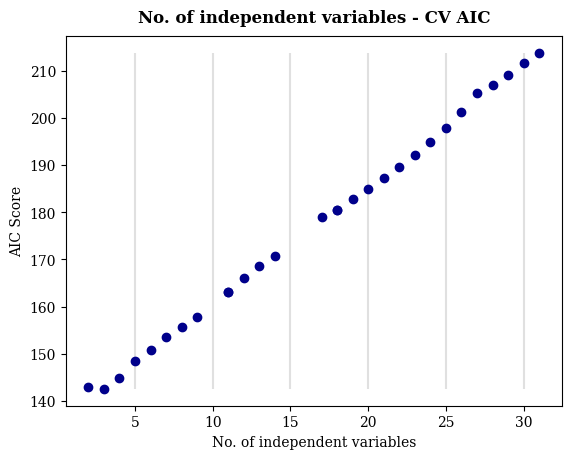

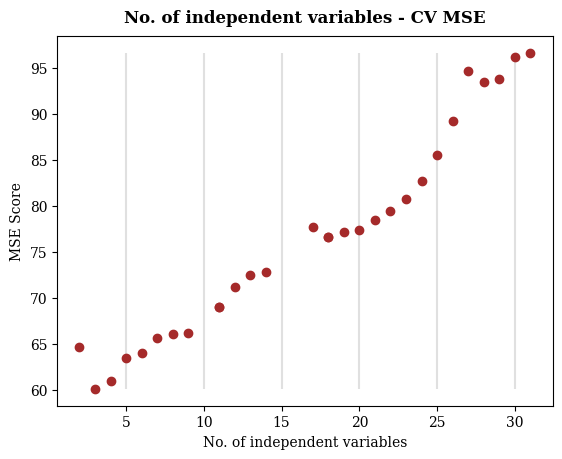

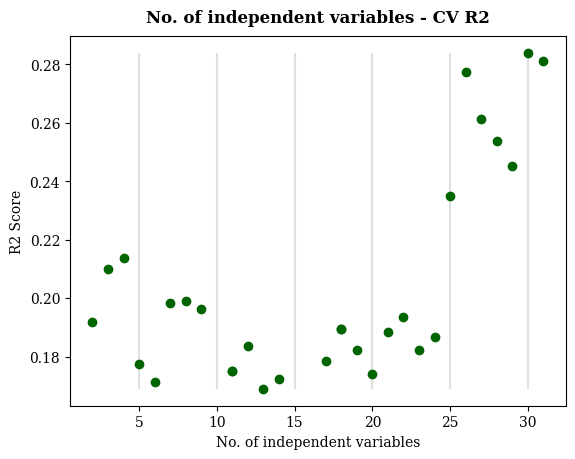

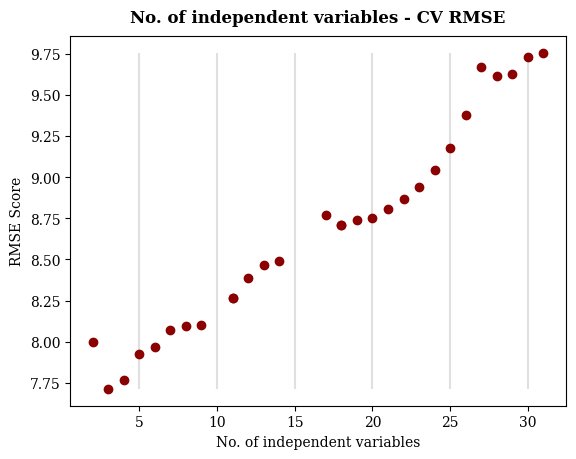

In [38]:
import matplotlib.pyplot as plt

a=0
b=0
c=0
d=0
while a < len(perfs_names):
    
    #define font
    plt.rcParams["font.family"] = "serif"
    x = Novar_performances["Novar"]
    y = Novar_performances[perfs_names[a]]
    fig, ax = plt.subplots()
    plt.title("No. of independent variables - "+  str(perfs[b]), fontweight='bold', pad=10)
    plt.xlabel("No. of independent variables")
    plt.ylabel(perfs_abvs[b] + " Score")
    
    plt.scatter(x, y, color = colors[d], zorder=10)
    ax.vlines([5, 10, 15, 20, 25, 30],min(y),max(y), linestyles='solid', colors='lightgrey', alpha=0.7, zorder=1)
    
    plt.savefig('Novars_' + str(perfs_names[a]) + '.jpg',bbox_inches='tight')
    a+=1
    b+=1
    c+=1
    d+=1
            
                

## Select dataset (no. vars) with best performance

In [39]:
#define no. of predictors that corresponds with best model performance
i = 30 - 2 #(a - b) - a is equal to preferred no. of predictors.
print(no_var_filter[i])

trafBuf50|road_class_2_5000|nightlight_900|Rsp|nightlight_450|NDVI|BldDen100$|trafBuf25|population_5000|road_class_3_100|road_class_3_1000|road_class_3_25|industry_3000|road_class_2_500|road_class_3_50|road_class_1_1000|road_class_3_5000|BldDen500|road_class_1_5000|road_class_2_3000|trafBuf800|oct|road_class_3_3000|population_3000|elevation|road_class_3_300|industry_5000|nightlight_4950|road_class_2_1000|road_class_2_25


In [40]:
dataset_bestMetrics = dataset_xy.filter(regex = 'trafBuf50|road_class_2_5000|nightlight_900|Rsp|nightlight_450|NDVI|BldDen100$|trafBuf25|population_5000|road_class_3_100$|road_class_3_1000|road_class_3_25|industry_3000|road_class_2_500|road_class_3_50$|road_class_1_1000|road_class_3_5000|BldDen500|road_class_1_5000|road_class_2_3000|trafBuf800|oct|road_class_3_3000|population_3000|elevation|road_class_3_300$|industry_5000|nightlight_4950|road_class_2_1000|road_class_2_25|Lopend_gemiddelde|Longitude|Latitude')

In [41]:
dataset_bestMetrics.head()

,Lopend_gemiddelde,Latitude,Longitude,elevation,industry_3000,industry_5000,nightlight_450,nightlight_4950,nightlight_900,population_3000,population_5000,road_class_1_1000,road_class_1_5000,road_class_2_1000,road_class_2_25,road_class_2_3000,road_class_2_500,road_class_2_5000,road_class_3_100,road_class_3_1000,road_class_3_25,road_class_3_300,road_class_3_3000,road_class_3_50,road_class_3_5000,Rsp,oct,BldDen100,BldDen500,NDVI,trafBuf25,trafBuf50,trafBuf800
0,28.1,52.375953,4.874295,5.982735,2321363.50,11116601.0,42.193073,35.638954,45.651295,127329.14060,337766.0625,0.000000,82977.21875,2592.219971,0.0,24632.15234,1246.440430,70853.39844,428.568573,31875.824220,105.729263,3112.374023,240209.7031,194.925980,576250.5625,9.674195,80.969711,0.997534,0.953362,1842.0,0.000000,0.000000,580.750000
1,56.2,52.333793,4.897935,4.526588,1831875.00,2688469.5,25.126129,31.613836,27.055981,91307.34375,259490.6875,7630.721680,102067.39840,5638.231934,0.0,28936.45508,1.261907,59697.10938,0.000000,7477.381836,0.000000,0.000000,197022.5469,0.000000,508921.8750,8.966270,80.934196,0.541161,0.245164,2725.0,3971.845502,3976.155390,2057.592956
2,39.1,52.384423,4.911975,3.534523,2229101.75,6684489.5,32.562141,28.821638,34.337959,113002.39840,276453.3125,5527.987793,88899.37500,4555.572266,0.0,29757.46094,0.000000,59120.18359,512.239441,23771.494140,72.042343,3009.411377,206470.1875,171.625412,499474.5625,9.641530,80.689293,0.000000,0.030938,1182.0,0.000000,1637.333333,1637.333333
3,42.9,52.384033,4.911455,3.252728,2253919.25,6744550.0,38.170528,29.826046,42.282043,113426.31250,278613.2188,5057.916504,89963.00000,4867.240723,0.0,30918.00781,0.000000,59951.94922,304.336395,21142.341800,19.737349,2360.115479,207631.3906,67.199661,507848.7500,9.636688,80.689293,0.000000,0.011044,637.0,0.000000,1637.333333,1637.333333
4,27.0,52.368693,4.924805,5.791729,1251322.25,4941854.0,38.704102,29.958410,39.803818,109224.32030,268250.8125,1914.580078,88179.25000,6990.282715,0.0,27483.03516,952.998230,54304.76953,111.149666,23020.345700,0.179775,1305.943726,211429.8281,6.303002,545223.8125,9.475898,80.561836,0.946325,0.938812,1536.0,0.000000,0.000000,1637.333333


## Export option

In [43]:
dataset_bestMetrics.to_csv('C:/Users/foeke/OneDrive/Documenten/submitting paper/All scripts - paper/data/LocalModelData/dataset_bestMetrics_longlat-Local-top30.csv')